In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = data[data['TotalCharges'] != ' ']
data['TotalCharges'] = data['TotalCharges'].astype(float)

for col in data.columns:
    if data[col].dtype == 'object':
        enc = preprocessing.LabelEncoder()
        data[col] = enc.fit_transform(data[col])
    else:
        data[col] = preprocessing.normalize([data[col]])[0] 
data.head()
 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0.0,1,0,0.000293,0,1,0,0,...,0,0,0,0,0,1,2,0.004983,0.000111,0
1,3953,1,0.0,0,0,0.009971,1,0,0,2,...,2,0,0,0,1,0,3,0.009506,0.007004,0
2,2558,1,0.0,0,0,0.000587,1,0,0,2,...,0,0,0,0,0,1,3,0.008989,0.000401,1
3,5524,1,0.0,0,0,0.013197,0,1,0,2,...,2,2,0,0,1,0,0,0.007061,0.006823,0
4,6500,0,0.0,0,0,0.000587,1,0,1,0,...,0,0,0,0,0,1,2,0.011801,0.000562,1


In [3]:
data=pd.read_csv("Student Study Hours.csv")
print(data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=np.array(data['Hours'])
Y=np.array(data['Scores'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [5]:
X_train

array([7.8, 6.9, 1.1, 5.1, 7.7, 3.3, 8.3, 9.2, 6.1, 3.5, 2.7, 5.5, 2.7,
       8.5, 2.5, 4.8, 8.9, 4.5])

In [6]:
Y_train

array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
       41])

In [7]:
# rember to reshape the X list in order to have a two dimensional array. 
# Since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [8]:
# we perform the regression
lr = LinearRegression().fit(X_train, Y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, Y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, Y_test):.2f}")

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.94


In [9]:
a = lr.coef_[0] # we ahve one feature with index 0
b = lr.intercept_ # a scalar
print(a, "* x +", b, "= y")

9.941678339488094 * x + 1.9322042531516601 = y


In [10]:
# we must get 3 predictions so I created a function i order to 'generalize' the method
def get_predictions(lr, goal_score):
    pred = lr.predict([[goal_score]])
    fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))
    
    x = X.T
    
    best_fit = b + a * (np.append(x, [goal_score]))
    
    ax_scat.scatter(x, Y, s=300, label='Training Data')
    ax_scat.plot(np.append(x,[goal_score]), best_fit, ls='--', label='Best Fit Line')
    
    ax_scat.plot([goal_score],pred, "ys", label="LinearRegression")
    ax_scat.set_xlabel(r'$x$')
    ax_scat.set_ylabel(r'$y$')

    caption = f"{pred[0]:.2f} hours of work are needed for a grade = {goal_score}"
    ax_scat.text(goal_score, pred, caption, fontsize=12, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.7))
    
    ax_scat.legend()
    plt.show()

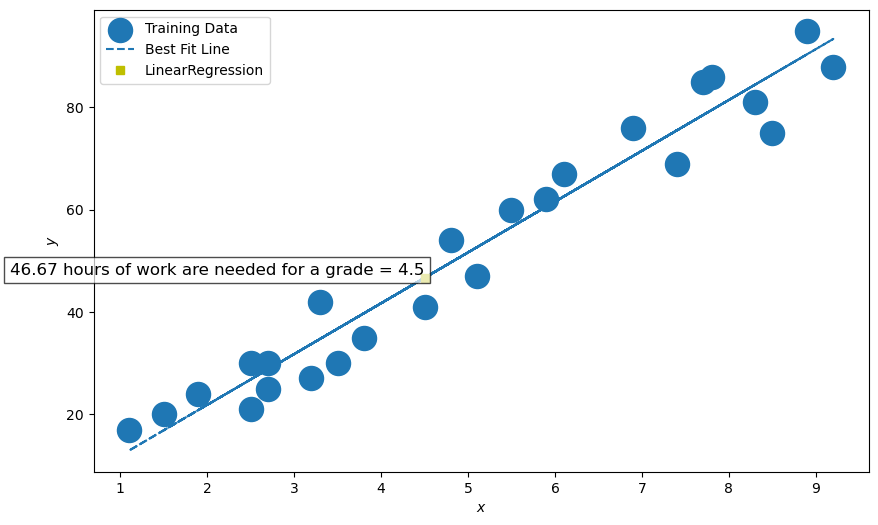

In [11]:
get_predictions(lr, 4.5)

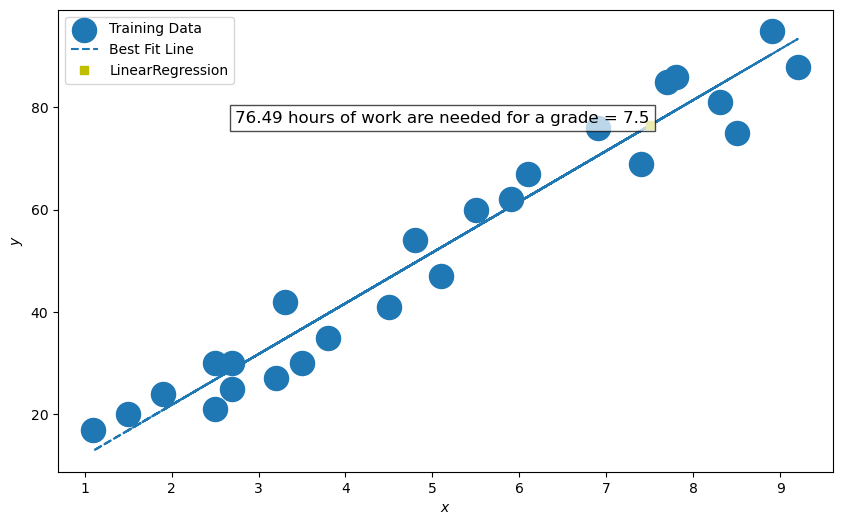

In [27]:
get_predictions(lr, 7.5)

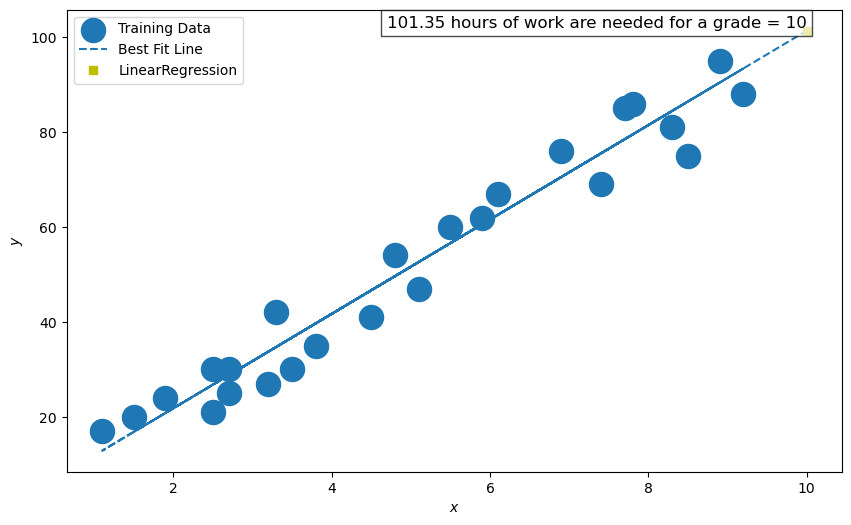

In [28]:
get_predictions(lr,10)

In [ ]:
# Now we do the regularisations for this model

In [30]:
# L2 regularisation -> ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.7).fit(X_train, Y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, Y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, Y_test):.2f}")

Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.94


In [31]:
# L1 regularisation -> lasoo regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0).fit(X_train, Y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, Y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, Y_test):.2f}")

Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.94


In [32]:
# Elastic Net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, Y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, Y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, Y_test):.2f}")

Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94
